In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thepbordin/indoor-object-detection")

print("Path to dataset files:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 367M/367M [00:02<00:00, 136MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1


In [8]:
import os

# –í–∏–≤–æ–¥–∏–º–æ —Å–ø–∏—Å–æ–∫ —Ñ–∞–π–ª—ñ–≤ —É –≥–æ–ª–æ–≤–Ω—ñ–π –ø–∞–ø—Ü—ñ –¥–∞—Ç–∞—Å–µ—Ç—É
dataset_path = path
print("Dataset structure:\n")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = " " * 2 * (level + 1)
    for f in files[:5]:  # –í–∏–≤–æ–¥–∏–º–æ –ø–µ—Ä—à—ñ 5 —Ñ–∞–π–ª—ñ–≤ —É –∫–æ–∂–Ω—ñ–π –ø–∞–ø—Ü—ñ
        print(f"{sub_indent}{f}")


Dataset structure:

1/
  data.yaml
  valid/
    labels/
      0d5e7db77f1c27d8.txt
      02d35eb7ad2388f1.txt
      a12ad8a06226a6dd.txt
      images14.txt
      DOR_S3_66.txt
    images/
      DOR_S3_70.JPG
      6383961ebbfed4bd.jpg
      0896f7f8ba671953.jpg
      0da7328a8d12180f.jpg
      0bbea2cd35fe261d.jpg
  train/
    labels/
      02719a20199eaf3f.txt
      cd0f444cde5e6f84.txt
      60b0562e30e0c69a.txt
      c8d7361c8e81ab81.txt
      9.txt
    images/
      92a2fd9a41e602a5.jpg
      994a97bc1ec49cf2.jpg
      31780c088d1708b4.jpg
      2ae027b4be8f51cd.jpg
      2ba0dbc88f47be4f.jpg
  test/
    labels/
      1345.txt
      1047.txt
      127.txt
      1015.txt
      1217.txt
    images/
      1125.png
      923.png
      116.png
      1003.png
      1034.png


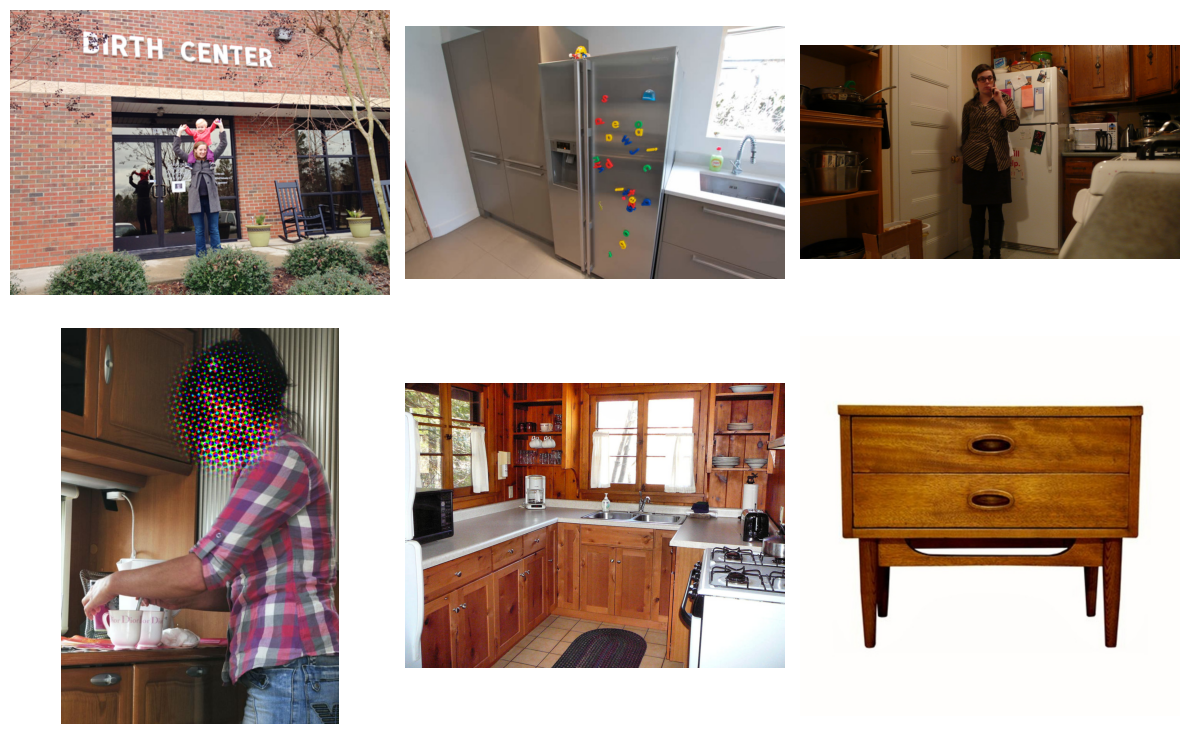

In [9]:
import matplotlib.pyplot as plt
import cv2
import random
from glob import glob

# –û—Ç—Ä–∏–º—É—î–º–æ —Å–ø–∏—Å–æ–∫ –≤—Å—ñ—Ö –∑–æ–±—Ä–∞–∂–µ–Ω—å —É —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π –ø–∞–ø—Ü—ñ
train_images = glob(os.path.join(dataset_path, "train", "images", "*.jpg"))

# –í–∏–±–∏—Ä–∞—î–º–æ 6 –≤–∏–ø–∞–¥–∫–æ–≤–∏—Ö –∑–æ–±—Ä–∞–∂–µ–Ω—å
random_images = random.sample(train_images, 6)

# –í—ñ–¥–æ–±—Ä–∞–∂–∞—î–º–æ —ó—Ö
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for img_path, ax in zip(random_images, axes.flat):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [10]:
import yaml

# –í—ñ–¥–∫—Ä–∏–≤–∞—î–º–æ data.yaml
yaml_path = os.path.join(dataset_path, "data.yaml")
with open(yaml_path, "r") as f:
    data_yaml = yaml.safe_load(f)

# –í–∏–≤–æ–¥–∏–º–æ –≤–º—ñ—Å—Ç data.yaml
print("Data.yaml content:\n", data_yaml)

# –í–∏—Ç—è–≥—É—î–º–æ –∫–ª–∞—Å–∏
class_names = data_yaml["names"]
print("\nClasses:", class_names)


Data.yaml content:
 {'train': '/content/data/train/images', 'val': '/content/data/valid/images', 'test': '/content/data/test/images', 'nc': 10, 'names': ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']}

Classes: ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']


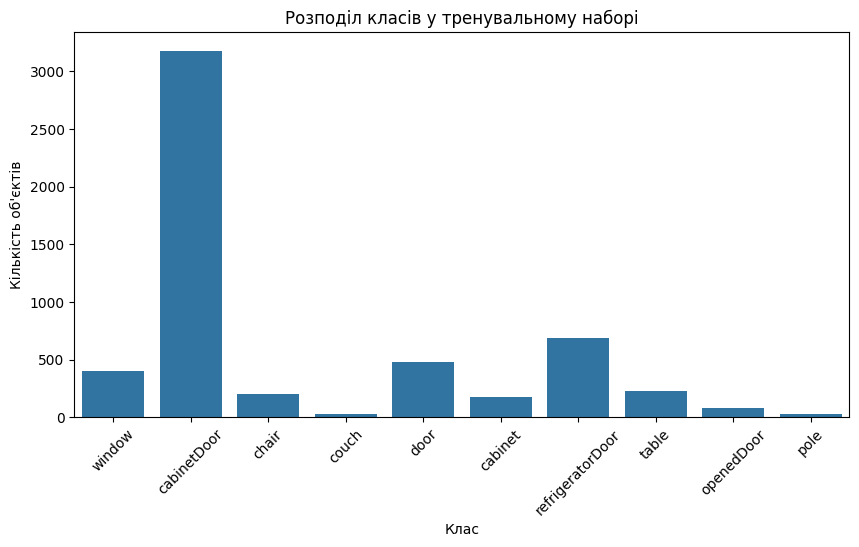

In [11]:
import seaborn as sns
from collections import Counter

# –ó—á–∏—Ç–∞—î–º–æ –≤—Å—ñ –∞–Ω–æ—Ç–∞—Ü—ñ—ó (YOLO —Ñ–æ—Ä–º–∞—Ç—É)
labels_path = os.path.join(dataset_path, "train", "labels")
label_files = glob(os.path.join(labels_path, "*.txt"))

# –õ—ñ—á–∏–ª—å–Ω–∏–∫ –æ–±'—î–∫—Ç—ñ–≤ —É –∫–ª–∞—Å–∞—Ö
class_counts = Counter()

for label_file in label_files:
    with open(label_file, "r") as f:
        for line in f:
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

# –í—ñ–∑—É–∞–ª—ñ–∑—É—î–º–æ
plt.figure(figsize=(10, 5))
sns.barplot(x=[class_names[i] for i in class_counts.keys()], y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("–ö–ª–∞—Å")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–±'—î–∫—Ç—ñ–≤")
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –∫–ª–∞—Å—ñ–≤ —É —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ")
plt.show()


In [12]:
class Config:
    DATASET_PATH = path
    TRAIN_IMAGES = os.path.join(DATASET_PATH, "train", "images")
    VALID_IMAGES = os.path.join(DATASET_PATH, "valid", "images")
    TEST_IMAGES = os.path.join(DATASET_PATH, "test", "images")
    LABELS_PATH = os.path.join(DATASET_PATH, "train", "labels")
    NUM_CLASSES = 10
    CLASS_NAMES = class_names
    BATCH_SIZE = 16
    IMAGE_SIZE = 640  # –¥–ª—è YOLO

cfg = Config()
print("–ö–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—è –∑–±–µ—Ä–µ–∂–µ–Ω–∞!")


–ö–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—è –∑–±–µ—Ä–µ–∂–µ–Ω–∞!


In [13]:
yaml_content = f"""train: {cfg.TRAIN_IMAGES}
val: {cfg.VALID_IMAGES}
test: {cfg.TEST_IMAGES}

nc: {cfg.NUM_CLASSES}

names:
{chr(10).join(f"- {name}" for name in cfg.CLASS_NAMES)}
"""

# –ó–∞–ø–∏—Å—É—î–º–æ –≤ —Ñ–∞–π–ª
yaml_path = os.path.join(cfg.DATASET_PATH, "yolov9s_config.yaml")
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"–ö–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π–Ω–∏–π —Ñ–∞–π–ª —Å—Ç–≤–æ—Ä–µ–Ω–æ: {yaml_path}")


–ö–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π–Ω–∏–π —Ñ–∞–π–ª —Å—Ç–≤–æ—Ä–µ–Ω–æ: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/yolov9s_config.yaml


In [15]:
config_text = """train: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/train/images
val: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/valid/images
test: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/test/images

nc: 10
names: ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']
"""

# –ó–∞–ø–∏—Å—É—î–º–æ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—é —É —Ñ–∞–π–ª
with open("yolov9s_config.yaml", "w") as f:
    f.write(config_text)

print("–§–∞–π–ª –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π —Å—Ç–≤–æ—Ä–µ–Ω–æ!")

# –ü–µ—Ä–µ–≤—ñ—Ä—è—î–º–æ, —â–æ —Ñ–∞–π–ª —Å—Ç–≤–æ—Ä–µ–Ω–æ
!cat yolov9s_config.yaml


–§–∞–π–ª –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó —Å—Ç–≤–æ—Ä–µ–Ω–æ!
train: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/train/images
val: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/valid/images
test: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/test/images

nc: 10
names: ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']


In [16]:
import os
print(os.listdir())


['.config', 'yolov9s_config.yaml', 'sample_data']


In [17]:
!pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 914.9/914.9 kB 17.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 71.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [18]:
from ultralytics import YOLO

# –ó–∞–≤–∞–Ω—Ç–∞–∂—É—î–º–æ YOLOv9s
model = YOLO("yolov9s.pt")

# –í–∏–≤–æ–¥–∏–º–æ —Å—Ç—Ä—É–∫—Ç—É—Ä—É –º–æ–¥–µ–ª—ñ
model.info()


Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.7M/14.7M [00:00<00:00, 114MB/s] 


YOLOv9s summary: 917 layers, 7,318,368 parameters, 0 gradients, 27.6 GFLOPs


(917, 7318368, 0, 27.5552768)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
!yolo task=detect mode=train model=yolov9s.pt data=yolov9s_config.yaml epochs=5 imgsz=640 batch=4 project="/content/drive/MyDrive/YOLO_training"


Ultralytics 8.3.75 üöÄ Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=yolov9s_config.yaml, epochs=5, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YOLO_training, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

In [3]:
!ls -lah /content/drive/MyDrive/YOLO_training/train

total 5.6M
-rw------- 1 root root 1.6K Feb 16 06:23 args.yaml
-rw------- 1 root root 218K Feb 16 10:24 confusion_matrix_normalized.png
-rw------- 1 root root 184K Feb 16 10:24 confusion_matrix.png
-rw------- 1 root root 628K Feb 16 10:26 events.out.tfevents.1739687027.ec464042c0a6.10318.0
-rw------- 1 root root 318K Feb 16 10:24 F1_curve.png
-rw------- 1 root root 244K Feb 16 06:23 labels_correlogram.jpg
-rw------- 1 root root 242K Feb 16 06:23 labels.jpg
-rw------- 1 root root 351K Feb 16 10:24 P_curve.png
-rw------- 1 root root 252K Feb 16 10:24 PR_curve.png
-rw------- 1 root root 282K Feb 16 10:24 R_curve.png
-rw------- 1 root root  819 Feb 16 10:21 results.csv
-rw------- 1 root root 261K Feb 16 10:24 results.png
-rw------- 1 root root 239K Feb 16 06:24 train_batch0.jpg
-rw------- 1 root root 215K Feb 16 06:24 train_batch1.jpg
-rw------- 1 root root 189K Feb 16 06:24 train_batch2.jpg
-rw------- 1 root root 352K Feb 16 10:21 val_batch0_labels.jpg
-rw------- 1 root root 353K Feb 16 10

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss'], 'distributions': [], 'tensors': [], 'graph': True, 'meta_graph': False, 'run_metadata': ['step1']}


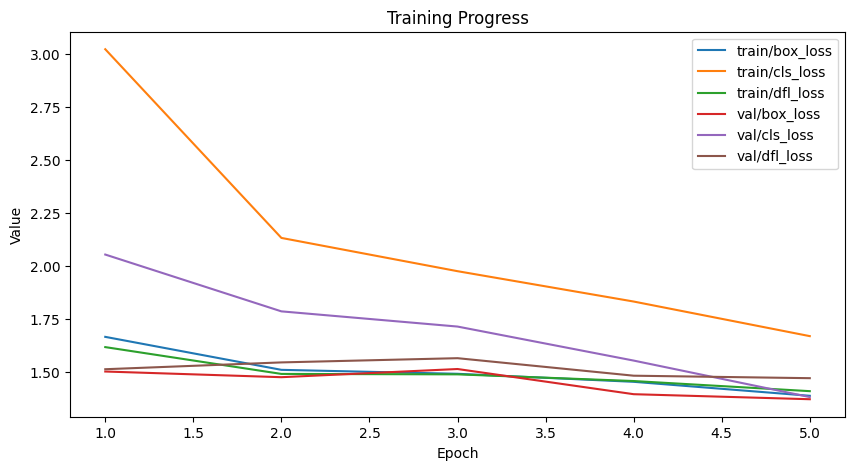

In [7]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

!pip install tensorboard

log_files = glob("/content/drive/MyDrive/YOLO_training/train/events.out.tfevents.1739687027.ec464042c0a6.10318.0")

if log_files:
    from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

    reader = EventAccumulator(log_files[0])
    reader.Reload()

    print(reader.Tags())

    data = {tag: [] for tag in reader.Tags()['scalars'] if tag in ["train/box_loss", "train/cls_loss", "train/dfl_loss", "val/box_loss", "val/cls_loss", "val/dfl_loss", "metrics/mAP_0.5", "metrics/mAP_0.5:0.95", "metrics/precision", "metrics/recall", "metrics/f1_score"]}


    for tag in data.keys():
        for scalar_event in reader.Scalars(tag):
            data[tag].append((scalar_event.step, scalar_event.value))


    plt.figure(figsize=(10, 5))
    for tag, values in data.items():
        steps, values = zip(*values)
        plt.plot(steps, values, label=tag)
    plt.legend()
    plt.title("Training Progress")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.show()
else:
    print("–§–∞–π–ª –ª–æ–≥—ñ–≤ –Ω–µ –∑–Ω–∞–π–¥–µ–Ω–æ!")

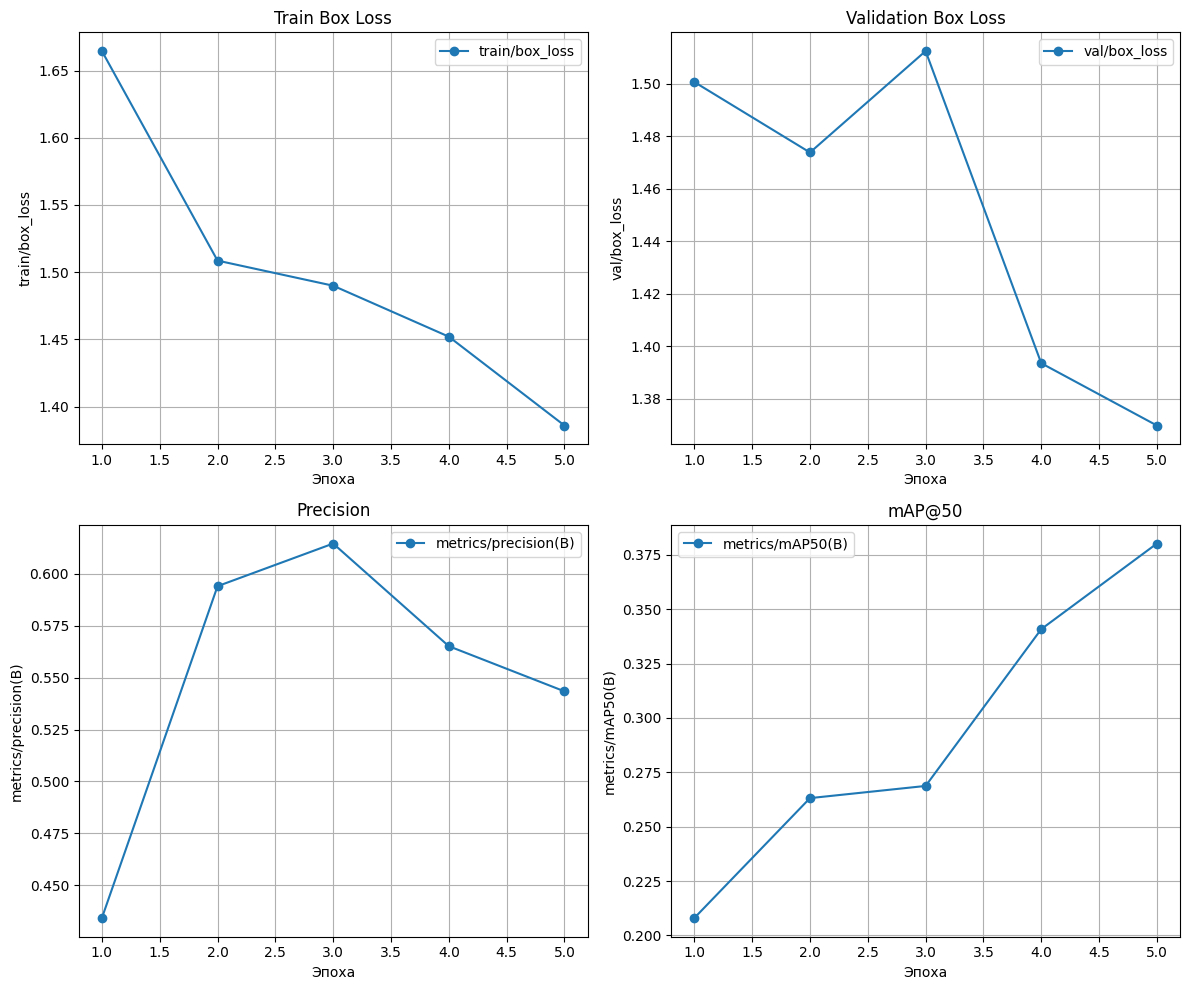

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/YOLO_training/train/results.csv"
df = pd.read_csv(file_path)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

def plot_metric(ax, metric, title):
    ax.plot(df['epoch'], df[metric], label=metric, marker='o')
    ax.set_title(title)
    ax.set_xlabel('–≠–ø–æ—Ö–∞')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid()

plot_metric(axes[0, 0], 'train/box_loss', 'Train Box Loss')
plot_metric(axes[0, 1], 'val/box_loss', 'Validation Box Loss')
plot_metric(axes[1, 0], 'metrics/precision(B)', 'Precision')
plot_metric(axes[1, 1], 'metrics/mAP50(B)', 'mAP@50')

plt.tight_layout()
plt.show()


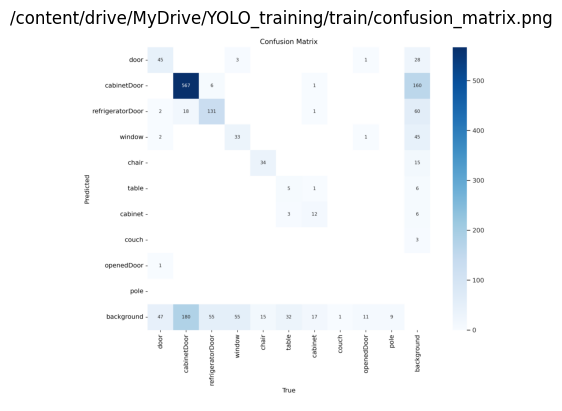

In [15]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

png_files = glob.glob("/content/drive/MyDrive/YOLO_training/train/confusion_matrix.png")

if png_files:
    for file_path in png_files:
        image = mpimg.imread(file_path)

        plt.imshow(image)
        plt.title(file_path)
        plt.axis('off')
        plt.show()
else:
    print("No PNG files found in the current directory.")

# –ê–Ω–∞–ª—ñ–∑ –ø–æ–º–∏–ª–æ–∫ –º–æ–¥–µ–ª—ñ
–ù–∞–π–∫—Ä–∞—â–µ –º–æ–¥–µ–ª—å —Å–ø—Ä–∞–≤–ª—è—î—Ç—å—Å—è –∑ –∫–ª–∞—Å–æ–º cabinetDoor, –æ—Å–∫—ñ–ª—å–∫–∏ –º–∞—î –Ω–∞–π–±—ñ–ª—å—à–µ –ø—Ä–∞–≤–∏–ª—å–Ω–∏—Ö –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å (567 –≤–∏–ø–∞–¥–∫—ñ–≤).

- –ù–∞–π–±—ñ–ª—å—à—ñ –ø—Ä–æ–±–ª–µ–º–∏:

door —ñ–Ω–æ–¥—ñ –ø–æ–º–∏–ª–∫–æ–≤–æ –∫–ª–∞—Å–∏—Ñ—ñ–∫—É—î—Ç—å—Å—è —è–∫ cabinetDoor, background –∞–±–æ openedDoor.

refrigeratorDoor –º–∞—î –ø–µ—Ä–µ—Ö—Ä–µ—Å–Ω—ñ –ø–æ–º–∏–ª–∫–∏ –∑ cabinetDoor —ñ background.

window —á–∞—Å—Ç–æ –≤–∏–∑–Ω–∞—á–∞—î—Ç—å—Å—è —è–∫ background, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—é –≤–∏—Ä–∞–∑–Ω—ñ—Å—Ç—å –æ–∑–Ω–∞–∫ —Ü—å–æ–≥–æ –∫–ª–∞—Å—É.

table, cabinet —ñ couch –∑—É—Å—Ç—Ä—ñ—á–∞—é—Ç—å—Å—è —Ä—ñ–¥–∫–æ —Ç–∞ –º–∞—é—Ç—å –Ω–∏–∑—å–∫—É —Ç–æ—á–Ω—ñ—Å—Ç—å.

- –ú–æ–∂–ª–∏–≤—ñ –ø—Ä–∏—á–∏–Ω–∏ –ø–æ–º–∏–ª–æ–∫

–í—ñ–∑—É–∞–ª—å–Ω–∞ —Å—Ö–æ–∂—ñ—Å—Ç—å –æ–±'—î–∫—Ç—ñ–≤:

door —Ç–∞ cabinetDoor –º–æ–∂—É—Ç—å –±—É—Ç–∏ —Å—Ö–æ–∂–∏–º–∏ –∑–∞ —Ñ–æ—Ä–º–æ—é —Ç–∞ –∫–æ–ª—å–æ—Ä–æ–º, —â–æ –≤–∏–∫–ª–∏–∫–∞—î –ø–µ—Ä–µ—Ö—Ä–µ—Å–Ω—ñ –ø–æ–º–∏–ª–∫–∏.
refrigeratorDoor –º–æ–∂–µ –±—É—Ç–∏ –ø–æ–¥—ñ–±–Ω–∏–π –¥–æ cabinetDoor —á–µ—Ä–µ–∑ —Å—Ç–∏–ª—å –º–µ–±–ª—ñ–≤.
table —Ç–∞ cabinet –º–æ–∂—É—Ç—å –º–∞—Ç–∏ –ø–æ–¥—ñ–±–Ω—ñ —Ç–µ–∫—Å—Ç—É—Ä–∏ –∞–±–æ —Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è.

–ù–µ—Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª –∫–ª–∞—Å—ñ–≤:

–î–µ—è–∫—ñ –∫–ª–∞—Å–∏ –º–∞—é—Ç—å –∑–Ω–∞—á–Ω–æ –±—ñ–ª—å—à–µ –ø—Ä–∏–∫–ª–∞–¥—ñ–≤ —É –Ω–∞–≤—á–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ (cabinetDoor), —â–æ –ø–æ–∫—Ä–∞—â—É—î —ó—Ö–Ω—é —Ç–æ—á–Ω—ñ—Å—Ç—å.
–†—ñ–¥–∫—ñ—Å–Ω—ñ –∫–ª–∞—Å–∏ (couch, pole) –º–æ–∂—É—Ç—å –±—É—Ç–∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—å–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ñ, —â–æ –≤–ø–ª–∏–≤–∞—î –Ω–∞ —ó—Ö–Ω—é –∫–æ—Ä–µ–∫—Ç–Ω—ñ—Å—Ç—å.

–§–æ–Ω–æ–≤–∏–π —à—É–º:

–í–µ–ª–∏–∫–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å —è–∫ background —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –ø—Ä–æ–±–ª–µ–º—É –∑ —Ä–æ–∑—Ä—ñ–∑–Ω–µ–Ω–Ω—è–º –æ–±‚Äô—î–∫—Ç—ñ–≤ –≤—ñ–¥ –Ω–∞–≤–∫–æ–ª–∏—à–Ω—å–æ–≥–æ —Å–µ—Ä–µ–¥–æ–≤–∏—â–∞.

- –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü—ñ—ó –¥–ª—è –ø–æ–∫—Ä–∞—â–µ–Ω–Ω—è –º–æ–¥–µ–ª—ñ

–ë–∞–ª–∞–Ω—Å—É–≤–∞–Ω–Ω—è –¥–∞—Ç–∞—Å–µ—Ç—É:

–ú–æ–∂–Ω–∞ –∑–∞—Å—Ç–æ—Å—É–≤–∞—Ç–∏ oversampling –∞–±–æ data augmentation –¥–ª—è –º–∞–ª–æ–ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—Ö –∫–ª–∞—Å—ñ–≤ (couch, table, pole).

–î–æ–¥–∞–≤–∞–Ω–Ω—è –¥–æ–¥–∞—Ç–∫–æ–≤–∏—Ö –æ–∑–Ω–∞–∫:

–í–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω–æ—ó —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—ó (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, spatial relationships –º—ñ–∂ –æ–±'—î–∫—Ç–∞–º–∏) –º–æ–∂–µ –∑–º–µ–Ω—à–∏—Ç–∏ –ø–æ–º–∏–ª–∫–∏.

–¢–æ–Ω–∫–µ –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤:

–ï–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏ –∑ learning rate, batch size —Ç–∞ loss function –º–æ–∂—É—Ç—å –ø–æ–∫—Ä–∞—â–∏—Ç–∏ —Ä–æ–∑–ø—ñ–∑–Ω–∞–≤–∞–Ω–Ω—è –æ–∫—Ä–µ–º–∏—Ö –∫–ª–∞—Å—ñ–≤.

–ü–æ–∫—Ä–∞—â–µ–Ω–Ω—è —è–∫–æ—Å—Ç—ñ –∞–Ω–æ—Ç–∞—Ü—ñ–π:

–ú–æ–∂–ª–∏–≤–æ, –ø–æ–º–∏–ª–∫–∏ –≤–∏–∫–ª–∏–∫–∞–Ω—ñ –Ω–µ —Ç—ñ–ª—å–∫–∏ –º–æ–¥–µ–ª–ª—é, –∞ –π –Ω–µ—Ç–æ—á–Ω–∏–º–∏ –∞–±–æ –Ω–µ–ø–æ–≤–Ω–∏–º–∏ –º—ñ—Ç–∫–∞–º–∏ –≤ –Ω–∞–≤—á–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ.
–ó–±—ñ–ª—å—à–µ–Ω–Ω—è –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –µ–ø–æ—Ö –∞–±–æ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è pre-trained –º–æ–¥–µ–ª–µ–π:
–î–æ–¥–∞—Ç–∫–æ–≤–µ –Ω–∞–≤—á–∞–Ω–Ω—è –º–æ–∂–µ –ø–æ–∫—Ä–∞—â–∏—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏, –æ—Å–æ–±–ª–∏–≤–æ –¥–ª—è –∫–ª–∞—Å—ñ–≤, —â–æ –º–∞—é—Ç—å –Ω–∏–∑—å–∫—É —Ç–æ—á–Ω—ñ—Å—Ç—å.
# –í–∏—Å–Ω–æ–≤–æ–∫
–ó–∞–≥–∞–ª–æ–º –º–æ–¥–µ–ª—å –¥–æ–±—Ä–µ —Å–ø—Ä–∞–≤–ª—è—î—Ç—å—Å—è –∑ —Ä–æ–∑–ø—ñ–∑–Ω–∞–≤–∞–Ω–Ω—è–º cabinetDoor —ñ refrigeratorDoor, –∞–ª–µ –º–∞—î –ø—Ä–æ–±–ª–µ–º–∏ –∑ –º–µ–Ω—à —á–∞—Å—Ç–∏–º–∏ –∫–ª–∞—Å–∞–º–∏ (couch, table, pole). –ü–æ–º–∏–ª–∫–∏ —á–∞—Å—Ç–æ –ø–æ–≤'—è–∑–∞–Ω—ñ –∑ –≤—ñ–∑—É–∞–ª—å–Ω–æ—é —Å—Ö–æ–∂—ñ—Å—Ç—é –æ–±'—î–∫—Ç—ñ–≤ —ñ –¥–æ–º—ñ–Ω—É–≤–∞–Ω–Ω—è–º –∫–ª–∞—Å—É background. –î–ª—è –ø–æ–∫—Ä–∞—â–µ–Ω–Ω—è –ø–æ—Ç—Ä—ñ–±–Ω–æ –∑–±–∞–ª–∞–Ω—Å—É–≤–∞—Ç–∏ –¥–∞—Ç–∞—Å–µ—Ç, –æ–ø—Ç–∏–º—ñ–∑—É–≤–∞—Ç–∏ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –π –ø–æ–∫—Ä–∞—â–∏—Ç–∏ —è–∫—ñ—Å—Ç—å –∞–Ω–æ—Ç–∞—Ü—ñ–π.